# Load the preprocessed data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/book_genre_preprocessed.csv')

In [3]:
# Our goal is to predict the genre (y) from the combined title
# and summary (X)
X = df['combined_clean']
y = df['genre']
print(X.shape)
print(y.shape)
X.head(), y.head()

(4640,)
(4640,)


(0    drowned wednesday drowned wednesday first trus...
 1    lost hero book open jason awakens school bus u...
 2    eye overworld cugel easily persuaded merchant ...
 3    magic promise book open heraldmage vanyel retu...
 4    taran wanderer taran gurgi returned caer dallb...
 Name: combined_clean, dtype: object,
 0    fantasy
 1    fantasy
 2    fantasy
 3    fantasy
 4    fantasy
 Name: genre, dtype: object)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Text vectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#cv = CountVectorizer(ngram_range=(1,3))
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(type(X_train_tfidf))
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

# fit transform for the training data
#X_train_feats = cv.fit_transform(X_train)
# transform for the test data
#X_test_feats = cv.transform(X_test)

#print(type(X_train_feats))
#print(X_train_feats.shape)
#print(X_test_feats.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(3712, 51850)
(928, 51850)


# Linear SVC

In [14]:
from sklearn.svm import LinearSVC

svc = LinearSVC()

In [15]:
# train the model
model = svc.fit(X_train_tfidf, y_train)

In [16]:
y_pred = model.predict(X_test_tfidf)

# Evaluation

0.697198275862069
              precision    recall  f1-score   support

       crime       0.78      0.59      0.67       106
     fantasy       0.75      0.73      0.74       192
     history       0.71      0.76      0.74       119
      horror       0.65      0.59      0.62       115
  psychology       0.69      0.47      0.56        19
     romance       0.25      0.18      0.21        17
     science       0.71      0.75      0.73       123
      sports       1.00      0.73      0.85        15
    thriller       0.64      0.76      0.69       207
      travel       0.85      0.73      0.79        15

    accuracy                           0.70       928
   macro avg       0.70      0.63      0.66       928
weighted avg       0.70      0.70      0.69       928



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'crime'),
  Text(1.5, 0, 'fantasy'),
  Text(2.5, 0, 'history'),
  Text(3.5, 0, 'horror'),
  Text(4.5, 0, 'psychology'),
  Text(5.5, 0, 'romance'),
  Text(6.5, 0, 'science'),
  Text(7.5, 0, 'sports'),
  Text(8.5, 0, 'thriller'),
  Text(9.5, 0, 'travel')])

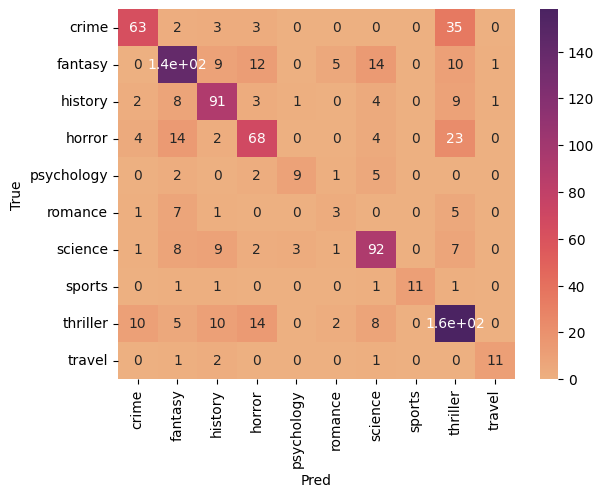

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm,annot=True,cmap='flare')
ax.set(xlabel='Pred',ylabel='True',xticklabels=classes,yticklabels=classes)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [20]:
def classify(X, y):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # text vectorization
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    
    # train model
    model = svc.fit(X_train_tfidf, y_train)
    
    # predict labels on test set
    y_pred = model.predict(X_test_tfidf)
    
    # return accuracy
    return accuracy_score(y_test, y_pred)

In [22]:
scores = list()
num_expts = 100
for i in range(num_expts):
    score = classify(X,y)
    scores.append(score)

print(sum(scores) / num_expts)

0.7156681034482759
